/tmp/ipykernel_17/3203826040.py:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set==j,0],x_set[y_set==j,1],


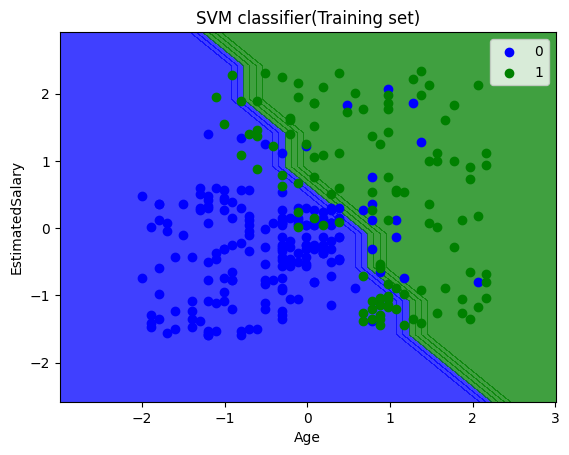

/tmp/ipykernel_17/3203826040.py:62: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set==j,0],x_set[y_set==j,1],


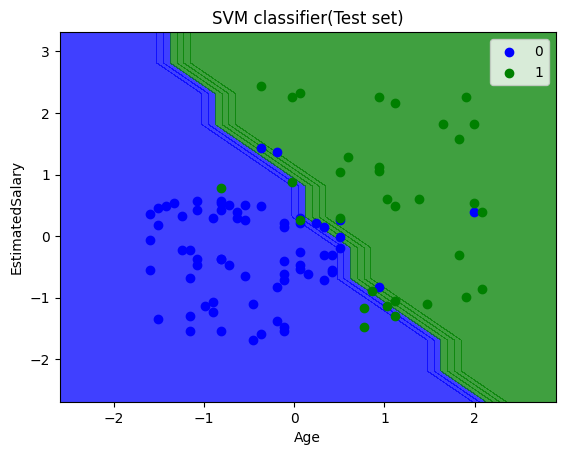

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp

#importing the dataset
data_set=pd.read_csv('/kaggle/input/social-network-adslogistic-regressionbinomial/Social Network Ads.csv')

#Extracting the independant and dependant Variable
x=data_set.iloc[:,[2,3]].values
y=data_set.iloc[:,4].values

#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)


#fitting the svm classifier into training model
from sklearn.svm import SVC #'Support vector classifier'
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

#predicting the test set result
y_pred=classifier.predict(x_test)

#creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

#visualising the training set
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.5),np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.5))
mtp.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('blue', 'green')))

mtp.xlim(x1.min(),x1.max())
mtp.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    mtp.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('blue','green'))(i),label=j)
mtp.title("SVM classifier(Training set)")
mtp.xlabel('Age')
mtp.ylabel('EstimatedSalary')
mtp.legend()
mtp.show()

#visualising the test set
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.5),np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.5))
mtp.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('blue', 'green')))

mtp.xlim(x1.min(),x1.max())
mtp.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    mtp.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('blue','green'))(i),label=j)
mtp.title("SVM classifier(Test set)")
mtp.xlabel('Age')
mtp.ylabel('EstimatedSalary')
mtp.legend()
mtp.show()
